# Test 



In [1]:
import os
#help(os.listdir)
#print(os.listdir())
#files = os.listdir('img_align_celeba/')
#print(files)
#[i for i in range(5)]
#[file_i for file_i in os.listdir('img_align_celeba') if '.jpg' in file_i]
files = [file_i
         for file_i in os.listdir('img_align_celeba')
         if file_i.endswith('.jpg')]
print(files)


['000006.jpg', '000008.jpg', '000003.jpg', '000010.jpg', '000002.jpg', '000005.jpg', '000001.jpg', '000007.jpg', '000004.jpg', '000009.jpg']


## library matplotlib

In [2]:
import matplotlib.pyplot as plt
#les visualisations se font sur notebook
%matplotlib inline 
#plt.imread?

## library numpy

In [3]:
import numpy as np

## Load image

In [4]:
#print(os.path.join('img_align_celeba', files[0]))
#plt.imread(os.path.join('img_align_celeba', files[0]))

files = [os.path.join('img_align_celeba', file_i)
 for file_i in os.listdir('img_align_celeba')
 if '.jpg' in file_i]
img = plt.imread(files[0])

## RGB Image Representation

(218, 178, 3)
uint8
float32


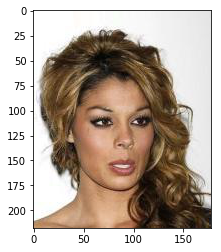

In [9]:
plt.imshow(img)
#plt.imshow(img[:,:,0])
print(img.shape)
print(img.dtype)
print(img.astype(np.float32).dtype) #in neural network we use to work in float32.

## Définition de la fonction plot_image

In [18]:
def plot_image(filename):
    img = plt.imread(filename)
    plt.imshow(img)

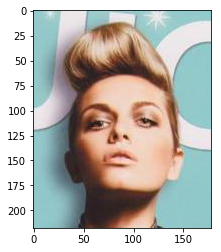

In [42]:
plot_image(files[np.random.randint(0,len(files))]) #plot random image from files list

## Crop de l'image en carré

In [43]:
def imcrop_tosquare(img):
    """Make any image a square image.

    Parameters
    ----------
    img : np.ndarray
        Input image to crop, assumed at least 2d.

    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop

## Crop une image d'un facteur compris entre 0 et 1

In [44]:
def imcrop(img, amt):
    if amt <= 0 or amt >= 1:
        return img
    row_i = int(img.shape[0] * amt) // 2
    col_i = int(img.shape[1] * amt) // 2
    return img[row_i:-row_i, col_i:-col_i]

## Import scipy

In [47]:
from scipy.misc import imresize
imresize?

/home/tib/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


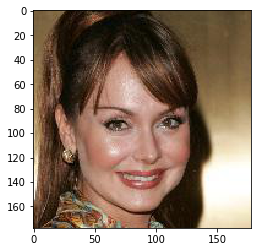

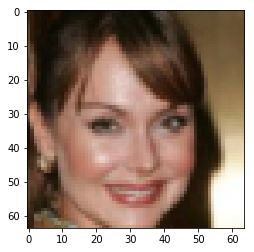

In [87]:
square = imcrop_tosquare(img)
plt.figure()
plt.imshow(square)
crop = imcrop(square, 0.2)
rsz = imresize(crop, (64, 64))
plt.figure()
plt.imshow(rsz)
#plt.figure()
#plt.imshow(rsz, interpolation='nearest')

### np.mean()

(64, 64)


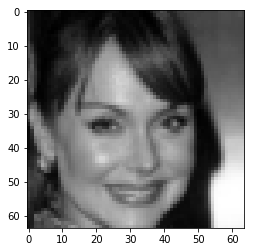

In [88]:
mean_img = np.mean(rsz, axis=2)
print(mean_img.shape)
plt.imshow(mean_img, cmap='gray')

## Constituer le dataset
On prend les images que l'on a récupéré, on applique les mêmes fonctions pour qu'elles aient le même format standard.

In [96]:
imgs = []
for file_i in files:
    img = plt.imread(file_i)
    square = imcrop_tosquare(img)
    crop = imcrop(square, 0.2)
    rsz = imresize(crop, (64, 64))
    imgs.append(rsz)
print(len(imgs))

10


/home/tib/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


(64, 64, 3)

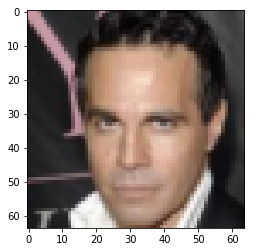

In [97]:
plt.imshow(imgs[1])
imgs[1].shape

## The Batch Dimension
N x H x W x C

In [71]:
data = np.array(imgs)
data.shape

(10, 64, 64, 3)